# 4-dars: Ehtimollik va taqsimotlar (normal, binomial, uniform, exponential)

Ushbu darsda ehtimollik nazariyasi va asosiy ehtimollik taqsimotlari (normal, binomial, uniform, eksponensial) bilan tanishamiz.
---

In [8]:
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced plotting
from scipy import stats  # Statistical functions

## 2. Normal taqsimot

Normal taqsimot (yoki Gauss taqsimoti) - eng mashhur uzluksiz ehtimollik taqsimotlaridan biri. Ko'plab tabiiy jarayonlar va o'lchovlar normal taqsimotga yaqinlashadi.

**Matematik formulasi:**

$$
    f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Bu yerda:
- $\mu$ — o'rtacha qiymat (mean)
- $\sigma$ — standart og'ish (standard deviation)

**Xususiyatlari:**
- Simmetrik
- O'rtacha atrofida zichlik yuqori
- 68-95-99.7 qoidasi amal qiladi

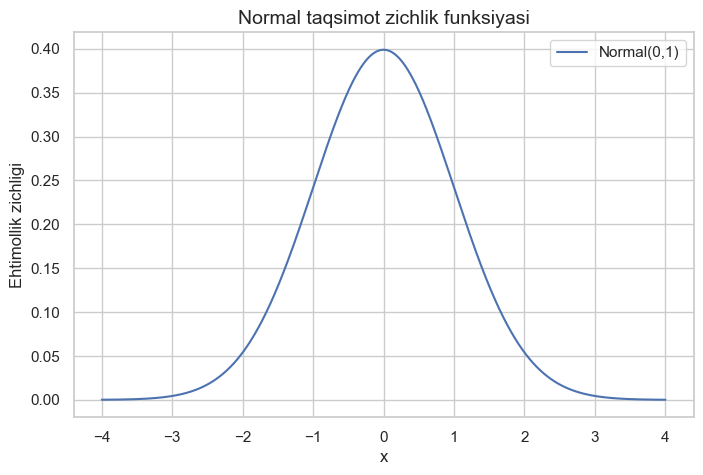

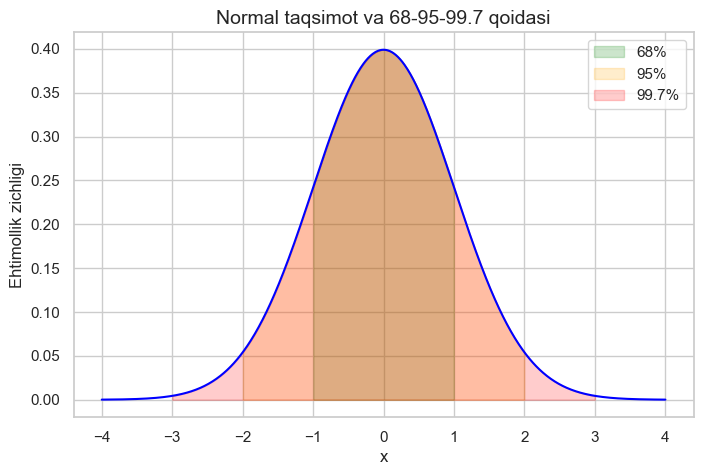

In [2]:
# Normal taqsimot namunasi va grafik
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, label='Normal(0,1)')
plt.title('Normal taqsimot zichlik funksiyasi')
plt.xlabel('x')
plt.ylabel('Ehtimollik zichligi')
plt.legend()
plt.show()

# 68-95-99.7 qoidasi uchun sohalarni ko'rsatish
plt.fill_between(x, y, where=(x > mu-sigma) & (x < mu+sigma), color='green', alpha=0.2, label='68%')
plt.fill_between(x, y, where=(x > mu-2*sigma) & (x < mu+2*sigma), color='orange', alpha=0.2, label='95%')
plt.fill_between(x, y, where=(x > mu-3*sigma) & (x < mu+3*sigma), color='red', alpha=0.2, label='99.7%')
plt.plot(x, y, color='blue')
plt.title('Normal taqsimot va 68-95-99.7 qoidasi')
plt.xlabel('x')
plt.ylabel('Ehtimollik zichligi')
plt.legend()
plt.show()

## 3. Binomial taqsimot

Binomial taqsimot - bu diskret ehtimollik taqsimoti bo'lib, har bir tajriba natijasi "muvaffaqiyat" yoki "muvaffaqiyatsizlik" bo'lgan n ta tajriba uchun muvaffaqiyatlar sonining taqsimotini ifodalaydi.

**Matematik formulasi:**

$$
    P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

Bu yerda:
- $n$ — tajribalar soni
- $k$ — muvaffaqiyatlar soni
- $p$ — muvaffaqiyat ehtimolligi

**Xususiyatlari:**
- Diskret taqsimot
- Har bir tajriba mustaqil
- $n$ va $p$ parametrlarga ega

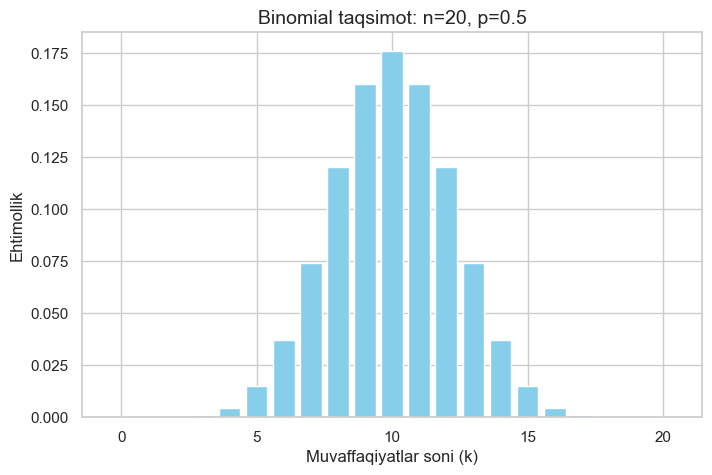

O'rtacha (mean): 10.0, Dispersiya (variance): 5.0


In [3]:
# Binomial taqsimot namunasi va grafik
n = 20  # Number of trials
p = 0.5  # Probability of success
k = np.arange(0, n+1)
pk = stats.binom.pmf(k, n, p)

plt.bar(k, pk, color='skyblue')
plt.title('Binomial taqsimot: n=20, p=0.5')
plt.xlabel('Muvaffaqiyatlar soni (k)')
plt.ylabel('Ehtimollik')
plt.show()

# Binomial taqsimot uchun o'rtacha va dispersiya
mean = n * p  # Mean
var = n * p * (1 - p)  # Variance
print(f"O'rtacha (mean): {mean}, Dispersiya (variance): {var}")

## 4. Uniform (bir tekis) taqsimot

Uniform taqsimot - har bir qiymat bir xil ehtimollikda paydo bo'ladigan taqsimot. Diskret va uzluksiz ko'rinishlari mavjud.

**Uzluksiz uniform taqsimot formulasi:**

$$
    f(x) = \frac{1}{b-a}, \quad a \leq x \leq b
$$

Bu yerda:
- $a$ — minimum qiymat
- $b$ — maksimum qiymat

**Xususiyatlari:**
- Har bir qiymat uchun ehtimollik bir xil
- Parametrlari: $a$ va $b$

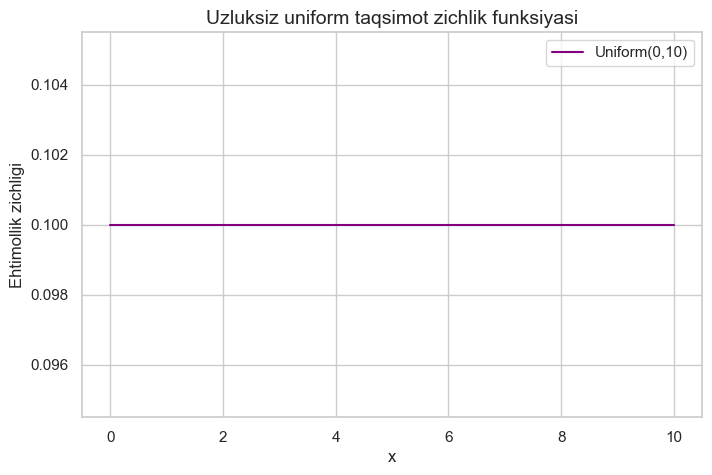

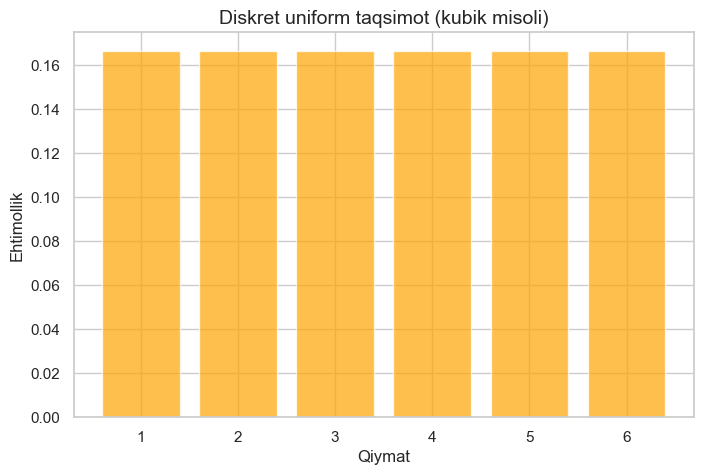

In [4]:
# Uniform taqsimot namunasi va grafik
a, b = 0, 10  # Interval
x = np.linspace(a, b, 1000)
y = stats.uniform.pdf(x, a, b-a)

plt.plot(x, y, color='purple', label='Uniform(0,10)')
plt.title('Uzluksiz uniform taqsimot zichlik funksiyasi')
plt.xlabel('x')
plt.ylabel('Ehtimollik zichligi')
plt.legend()
plt.show()

# Diskret uniform taqsimot uchun misol
discrete_vals = np.arange(1, 7)
p = np.ones_like(discrete_vals) / len(discrete_vals)
plt.bar(discrete_vals, p, color='orange', alpha=0.7)
plt.title('Diskret uniform taqsimot (kubik misoli)')
plt.xlabel('Qiymat')
plt.ylabel('Ehtimollik')
plt.show()

## 5. Eksponensial taqsimot

Eksponensial taqsimot - bu kutish vaqti yoki oraliq vaqtlarni modellashtirish uchun ishlatiladigan uzluksiz taqsimot.

**Matematik formulasi:**

$$
    f(x) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

Bu yerda:
- $\lambda$ — parametr (o'rtacha tezlik)

**Xususiyatlari:**
- Faqat musbat qiymatlar uchun
- O'rtacha: $1/\lambda$
- Dispersiya: $1/\lambda^2$

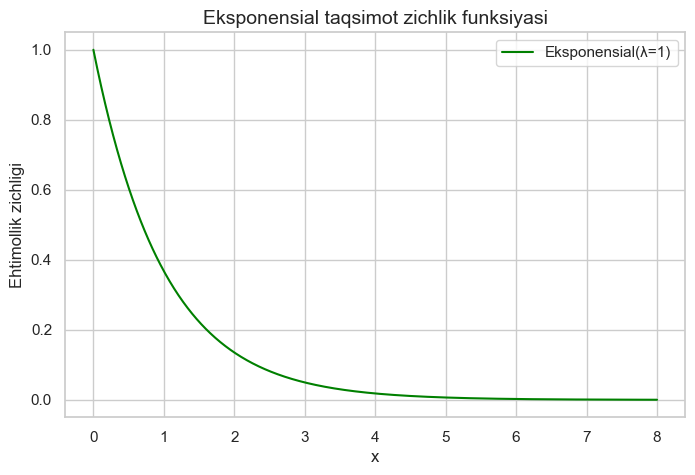

O'rtacha (mean): 1.0, Dispersiya (variance): 1.0


In [5]:
# Eksponensial taqsimot namunasi va grafik
lmbda = 1  # Lambda parameter
x = np.linspace(0, 8, 1000)
y = stats.expon.pdf(x, scale=1/lmbda)

plt.plot(x, y, color='green', label='Eksponensial(λ=1)')
plt.title('Eksponensial taqsimot zichlik funksiyasi')
plt.xlabel('x')
plt.ylabel('Ehtimollik zichligi')
plt.legend()
plt.show()

# O'rtacha va dispersiya
mean = 1 / lmbda
var = 1 / (lmbda ** 2)
print(f"O'rtacha (mean): {mean}, Dispersiya (variance): {var}")

## 6. Taqsimotlarni taqqoslash

Quyidagi grafikda barcha o'rganilgan taqsimotlar birga ko'rsatiladi. Parametrlar ta'siri va taqsimotlarning xususiyatlari taqqoslanadi.

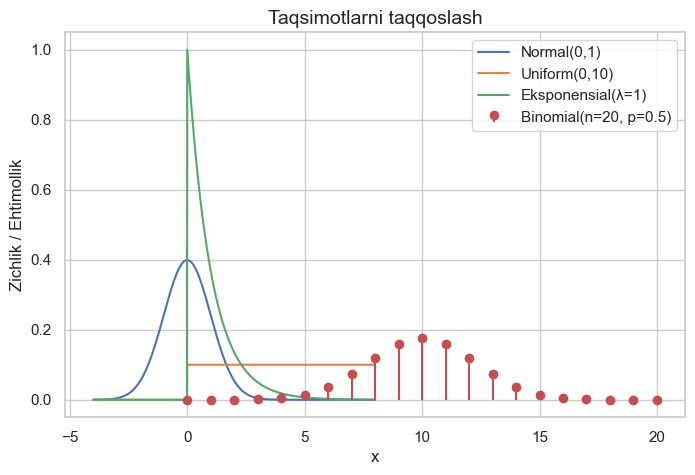

In [6]:
# Taqsimotlarni bir grafikda taqqoslash
x = np.linspace(-4, 8, 1000)
plt.plot(x, stats.norm.pdf(x, 0, 1), label='Normal(0,1)')
plt.plot(x, stats.uniform.pdf(x, 0, 10), label='Uniform(0,10)')
plt.plot(x, stats.expon.pdf(x, scale=1), label='Eksponensial(λ=1)')

# Binomial uchun diskret nuqtalar
k = np.arange(0, 21)
pk = stats.binom.pmf(k, 20, 0.5)
plt.stem(k, pk, linefmt='C3-', markerfmt='C3o', basefmt=" ", label='Binomial(n=20, p=0.5)')

plt.title('Taqsimotlarni taqqoslash')
plt.xlabel('x')
plt.ylabel('Zichlik / Ehtimollik')
plt.legend()
plt.show()

## 7. Amaliy mashqlar - 1-guruh

Quyidagi mashqlarni bajaring:

1. $\mu=5$, $\sigma=2$ bo'lgan normal taqsimotdan 1000 ta tasodifiy son generatsiya qiling va histogrammasini chizing.
2. $n=10$, $p=0.7$ bo'lgan binomial taqsimot uchun ehtimollik massasi funksiyasini (PMF) chizing.
3. $a=2$, $b=8$ bo'lgan uniform taqsimotdan 500 ta son generatsiya qiling va histogrammasini chizing.
4. $\lambda=0.5$ bo'lgan eksponensial taqsimotdan 1000 ta son generatsiya qiling va histogrammasini chizing.

## 8. Amaliy mashqlar - 2-guruh

Quyidagi mashqlarni bajaring:

1. $\mu=10$, $\sigma=3$ bo'lgan normal taqsimotdan 2000 ta son generatsiya qiling va natijani tahlil qiling.
2. $n=15$, $p=0.3$ bo'lgan binomial taqsimot uchun ehtimollik massasi funksiyasini chizing va o'rtacha qiymatini hisoblang.
3. $a=-5$, $b=5$ bo'lgan uniform taqsimotdan 1000 ta son generatsiya qiling va histogrammasini chizing.
4. $\lambda=2$ bo'lgan eksponensial taqsimotdan 500 ta son generatsiya qiling va natijani tahlil qiling.

## 9. Uyga vazifa

Quyidagi topshiriqlarni mustaqil bajaring:

1. $\mu=0$, $\sigma=5$ bo'lgan normal taqsimotdan 3000 ta son generatsiya qiling, histogramma va zichlik grafigini chizing.
2. $n=25$, $p=0.4$ bo'lgan binomial taqsimot uchun ehtimollik massasi funksiyasini chizing va natijani tahlil qiling.
3. $a=1$, $b=7$ bo'lgan uniform taqsimotdan 1500 ta son generatsiya qiling va natijani tahlil qiling.
4. $\lambda=1.5$ bo'lgan eksponensial taqsimotdan 2000 ta son generatsiya qiling va histogrammasini chizing.
5. Har bir taqsimot uchun grafiklarni taqqoslang va qisqacha tahlil yozing.